<img width="300px" src="https://cachimbo.pe/wp-content/uploads/2022/10/1-19.jpg"></img>

#**Estadística con Python**
## **Tema: Regresión II**
#### **Docente: Giron Rene Omar A.**

---------------

# **Regresión lineal**

## **Método Matricial**

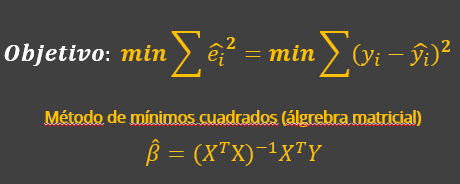

### **Simple**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 

def linear_regression_matrix(x, y): #regresion lineal por medio de matrices
    # Añadir una columna de unos a x para el término de intersección
    # X = np.vstack((np.ones(len(x)), x)).T
    # x = x.reshape(-1, 1)
    X = np.hstack((np.ones((x.shape[0], 1)), x)) #construir una columna de 1 (vector)
    Y = y[:, np.newaxis]  # Convertir y a un vector columnas

    # Calcular los parámetros de la regresión usando la ecuación normal
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y

    intercept = beta[0, 0]
    slope = beta[1, 0]

    return beta.flatten()

---- Algebra matricial ---
Intersección (intercept): 5.031965641400403
Pendiente (slope): 2.033153627343144
R^2: 0.9411566050982342


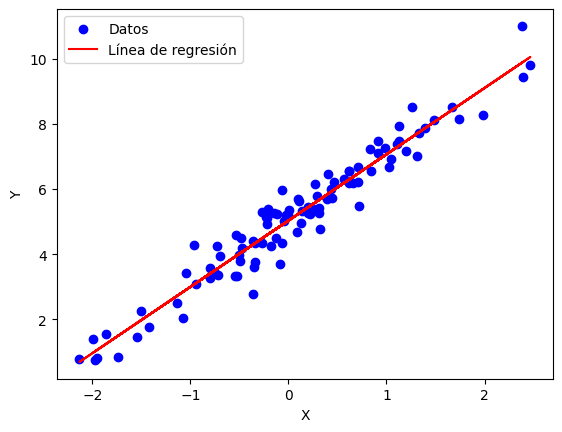

In [2]:
np.random.seed(10)
# x = np.random.uniform(0, 10, size=20)
# x = x.reshape(-1, 1)
x = np.random.randn(100, 1) #generar 100 datos
# y = 2 * x + 3 + np.random.normal(0, 1, size=20)
true_coeffs = np.array([2])
true_intercept = 5
y = true_intercept + x @ true_coeffs + np.random.randn(100) * 0.5 #funcion de regresion lineal con ruido adicional

# Aplicar la regresión lineal
beta = linear_regression_matrix(x, y)

# Predicciones usando la línea de regresión
y_pred = beta[0] + beta[1] * x

print("---- Algebra matricial ---")
print(f"Intersección (intercept): {beta[0]}")
print(f"Pendiente (slope): {beta[1]}")
print("R^2:", r2_score(y, y_pred))

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color="blue", label="Datos")
plt.plot(x, y_pred, color="red", label="Línea de regresión")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [3]:
#comentario adicional:
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### Multiple

In [4]:
np.random.seed(42)
n_samples = 100
n_features = 3

# Generar variables independientes
X = np.random.randn(n_samples, n_features)

# Generar coeficientes verdaderos
true_coeffs = np.array([2, -1, 3])
true_intercept = 5

# Generar variable dependiente con algo de ruido
y = true_intercept + X @ true_coeffs + np.random.randn(n_samples) * 0.5

# Aplicar regresión lineal múltiple
beta = linear_regression_matrix(X, y)

# Calcular las predicciones
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
y_pred = X_with_intercept @ beta

Coeficientes verdaderos: [ 5  2 -1  3]
Coeficientes estimados: [ 5.05643115  1.96116836 -1.02498178  2.94620334]
R²: 0.9865965608279693


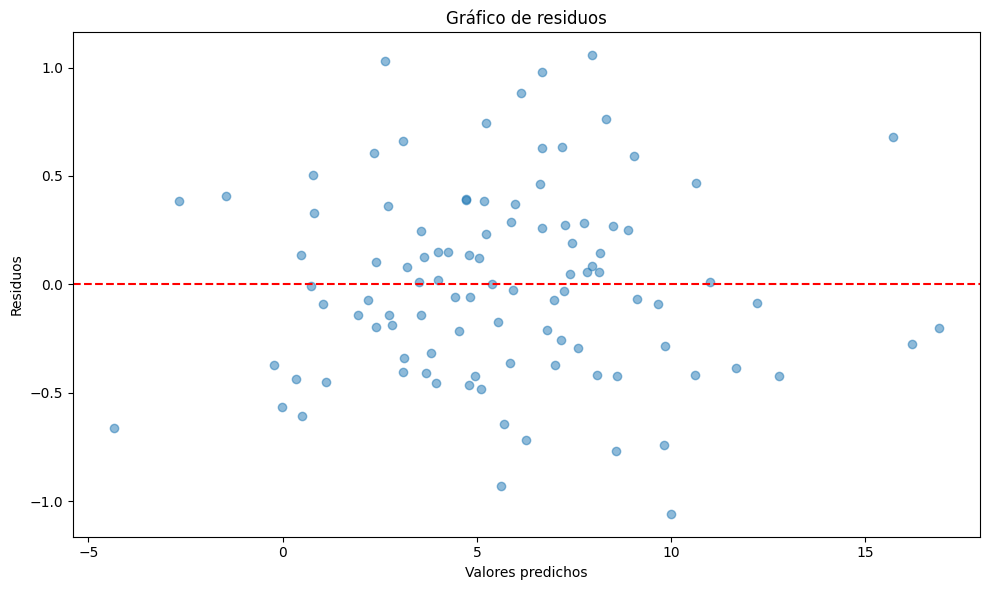

In [5]:
# Calcular R²
r2 = r2_score(y, y_pred)

print("Coeficientes verdaderos:", np.concatenate(([true_intercept], true_coeffs)))
print("Coeficientes estimados:", beta)
print("R²:", r2)

# Gráfico de residuos
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.tight_layout()
plt.show()

## **Método Sklearn**

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [7]:
def regresion_sklearn(x, y):
  """
  Realiza regresión lineal simple con scikit-learn.

  Argumentos:
    x (numpy.ndarray): Matriz de datos independientes (n_muestras, n_caracteristicas).
    y (numpy.ndarray): Vector de datos dependientes (n_muestras,).

  Retorna:
    Un objeto LinearRegression entrenado con los datos.
  """

  # Crear e instanciar el modelo de regresión lineal
  model = LinearRegression()

  # Ajustar el modelo a los datos
  model.fit(x[:, np.newaxis], y)

  # Retornar el modelo entrenado
  return model

In [8]:
# Generar datos de ejemplo
np.random.seed(10)
x = np.random.uniform(0, 10, size=20)
y = 2 * x + 3 + np.random.normal(0, 1, size=20)

In [9]:
# Realizar regresión lineal con scikit-learn
modelo_sklearn = regresion_sklearn(x, y)

# Obtener coeficientes y R^2 con scikit-learn
print("scikit-learn:")
print("Coeficiente intersección:", modelo_sklearn.intercept_)
print("Coeficiente pendiente:", modelo_sklearn.coef_[0])
print("R^2:", modelo_sklearn.score(x[:, np.newaxis], y))

scikit-learn:
Coeficiente intersección: 2.9274117686487564
Coeficiente pendiente: 2.046072133249616
R^2: 0.9675262931030713


## **Método Statsmodels**

In [10]:
def regresion_statsmodels(x, y):
  """
  Realiza regresión lineal simple con statsmodels.

  Argumentos:
    x (numpy.ndarray): Matriz de datos independientes (n_muestras, n_caracteristicas).
    y (numpy.ndarray): Vector de datos dependientes (n_muestras,).

  Retorna:
    Un objeto OLSResults de statsmodels con los resultados de la regresión.
  """

  # Agregar constante (término independiente) a la matriz de datos independientes
  x_constante = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1, 1))) #agrear a la matriz vector de unos

  # Crear el modelo de regresión lineal
  modelo = sm.OLS(y, x_constante)

  # Ajustar el modelo a los datos
  resultados = modelo.fit()

  # Retornar los resultados de la regresión
  return resultados

In [11]:
# Generar datos de ejemplo
np.random.seed(10)
x = np.random.uniform(0, 10, size=20)
y = 2 * x + 3 + np.random.normal(0, 1, size=20)

In [12]:
# Realizar regresión lineal con statsmodels
modelo_statsmodels = regresion_statsmodels(x, y)

# Obtener coeficientes y R^2 con statsmodels
print("\nstatsmodels:")
print("Coeficiente intersección:", modelo_statsmodels.params[0])
print("Coeficiente pendiente:", modelo_statsmodels.params[1])
print("R^2:", modelo_statsmodels.rsquared)


statsmodels:
Coeficiente intersección: 2.927411768648753
Coeficiente pendiente: 2.046072133249617
R^2: 0.9675262931030711


## Verificación de supuestos - Regresión Lineal Multiple

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

In [14]:
# Supuestos en regresión lineal usando statsmodels

# Ejemplo de datos ficticios
np.random.seed(0)
X = np.random.normal(size=(100, 3))
beta = np.array([1.5, -2.0, 1.0])
y = X @ beta + np.random.normal(size=100)

In [15]:
# Agregar constante para la intersección
X = sm.add_constant(X) #agregar a la matriz un vector de unos

# Ajustar el modelo
model = sm.OLS(y, X).fit()

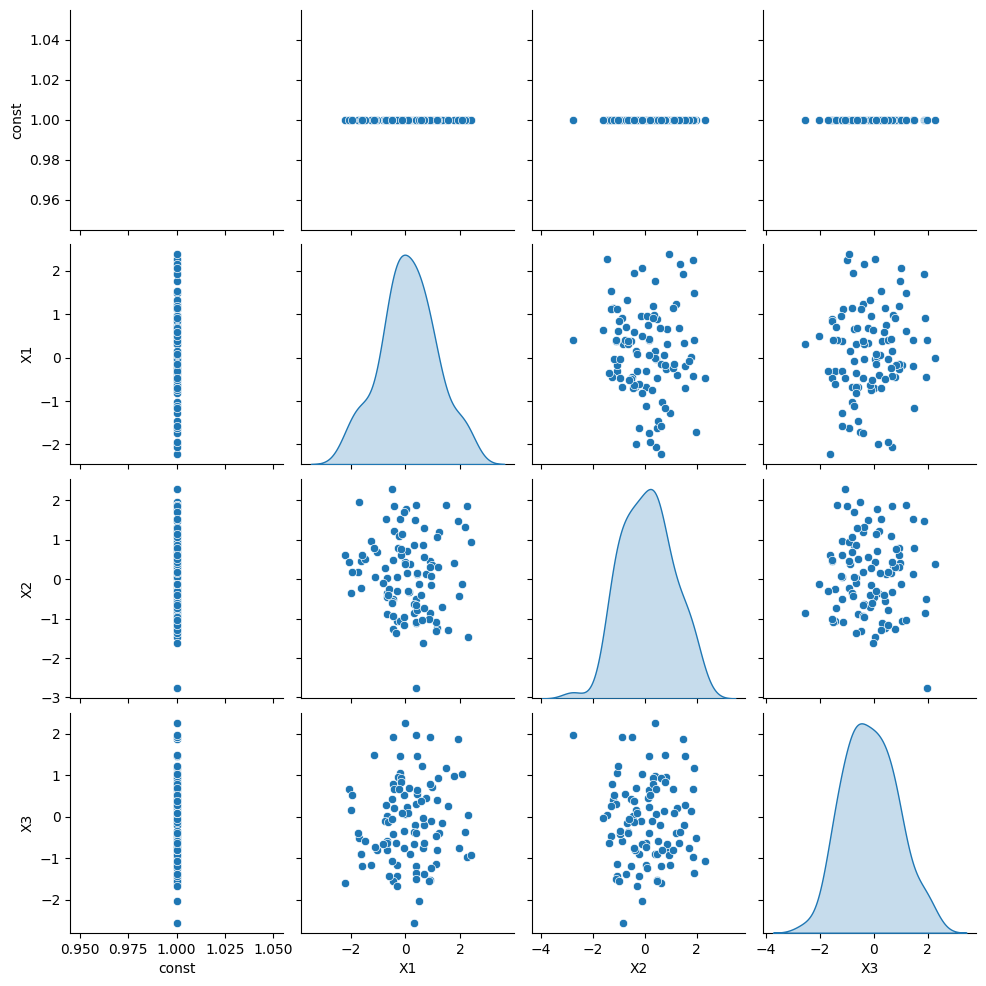

In [16]:
# 1. Linealidad - Gráfico de dispersión
sns.pairplot(pd.DataFrame(X, columns=['const', 'X1', 'X2', 'X3']), diag_kind='kde')
plt.show()

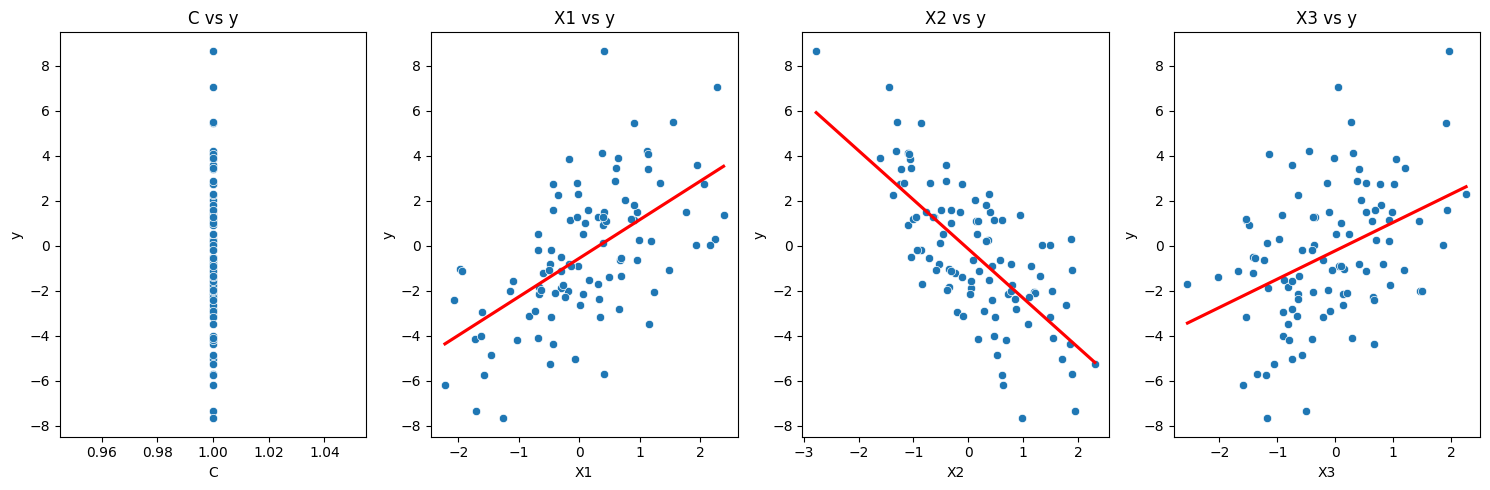

In [17]:
fig, axs = plt.subplots(1,4,figsize=(15,5))

for i, predictor in enumerate(['C','X1','X2','X3']):
    sns.scatterplot(x=X[:,i],y=y,ax=axs[i])
    sns.regplot(x=X[:,i],y=y,ax=axs[i],scatter=False,color='red',ci=None)
    axs[i].set_title(f'{predictor} vs y')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('y')
    
plt.tight_layout()
plt.show()

In [18]:
# 2. Independencia - Prueba de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')

#Si el resultado se aproxima a 2 no exite independencia

Durbin-Watson: 2.0567844247946105


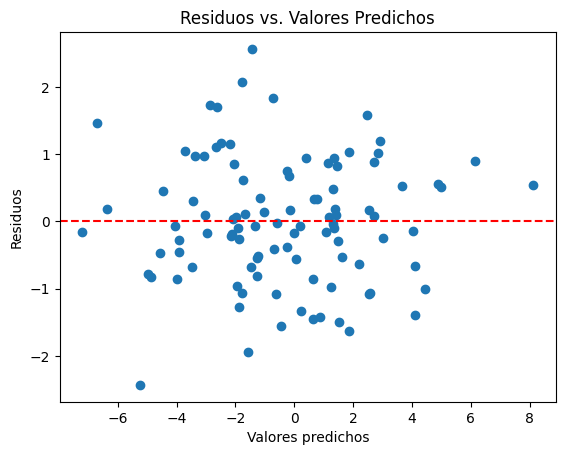

In [19]:
# 3. Homoscedasticidad - Gráfico de residuos vs. valores predichos
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Predichos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

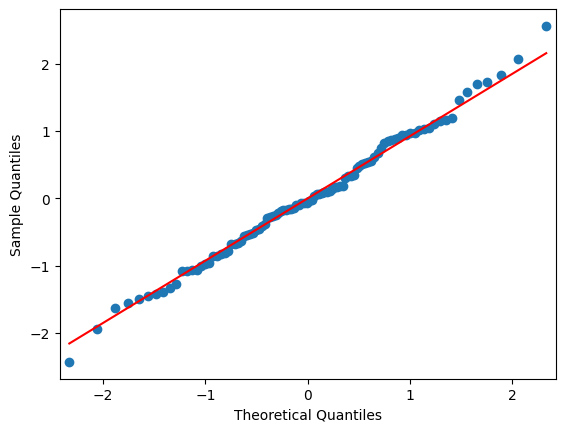

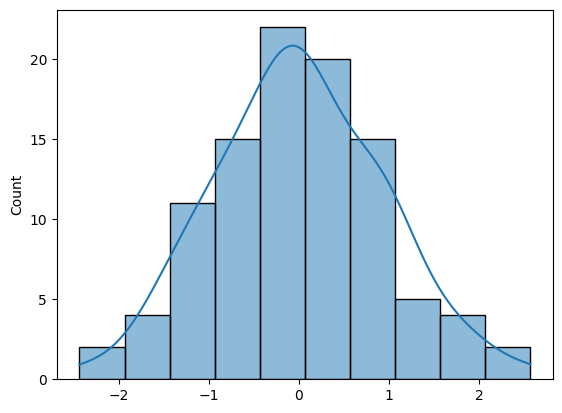

In [20]:
# 4. Normalidad de los errores - Histograma y gráfico Q-Q
sm.qqplot(model.resid, line='s')
plt.show()

sns.histplot(model.resid, kde=True)
plt.show()

In [21]:
# 5. Multicolinealidad - VIF
vif = pd.DataFrame()
vif['variable'] = ['const', 'X1', 'X2', 'X3']
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

#cada variable no debe exceder de exceder de 10 unidades, no existe multicolinealidad

  variable       VIF
0    const  1.041864
1       X1  1.017871
2       X2  1.005770
3       X3  1.012785


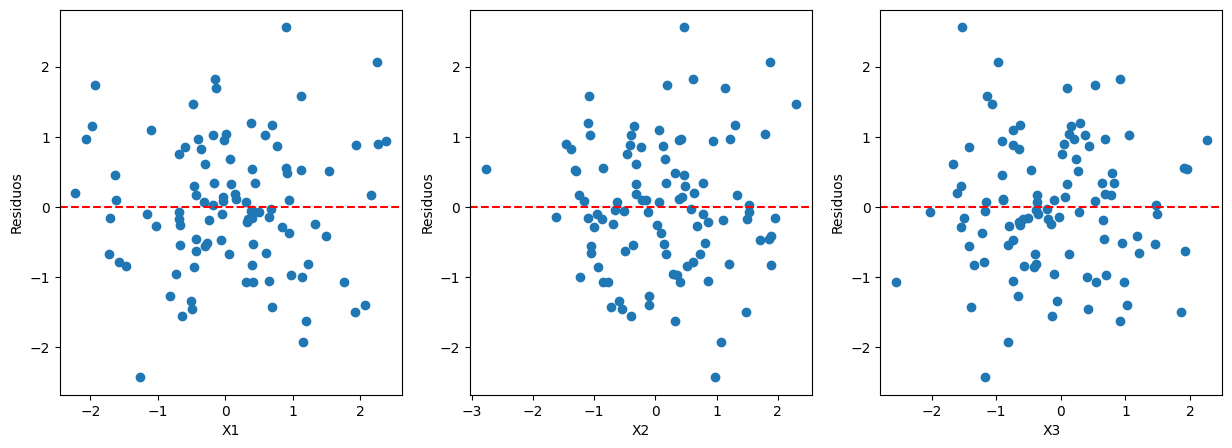

In [22]:
# 6. No correlación entre errores y variables independientes - Gráfico de residuos vs. cada predictor
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(1, 4):
    axs[i-1].scatter(X[:, i], model.resid)
    axs[i-1].set_xlabel(f'X{i}')
    axs[i-1].set_ylabel('Residuos')
    axs[i-1].axhline(y=0, color='r', linestyle='--')
plt.show()

## Verificación del rendimiento del modelo

In [23]:
# Predición del test
y_pred = model.predict(sm.add_constant(X))

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

# Evaluación del modelo

print('Mean Absolute Error:',      metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:',       metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y, y_pred)))

rmse_ols = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2_ols=r2_score(y,y_pred)

print("")
print(f"El error (rmse) es: {r2_ols}")

Mean Absolute Error: 0.7319117392988045
Mean Squared Error: 0.858349197463852
Root Mean Squared Error: 0.9264713689390796

El error (rmse) es: 0.9053071086057121


# **Regresión Logística**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Esto es la función sigmoide


In [25]:
# Generar datos sintéticos
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = (X > 5).astype(int).ravel()

# Añadir un sesgo a los datos
X_b = np.c_[np.ones((X.shape[0], 1)), X]


In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, theta):
    return sigmoid(X @ theta)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [27]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-10, 10, 100)

loss_values = np.zeros((100, 100))

for i, t0 in enumerate(theta_0):
    for j, t1 in enumerate(theta_1):
        theta = np.array([t0, t1])
        y_pred = predict_proba(X_b, theta)
        loss_values[i, j] = mse_loss(y, y_pred)

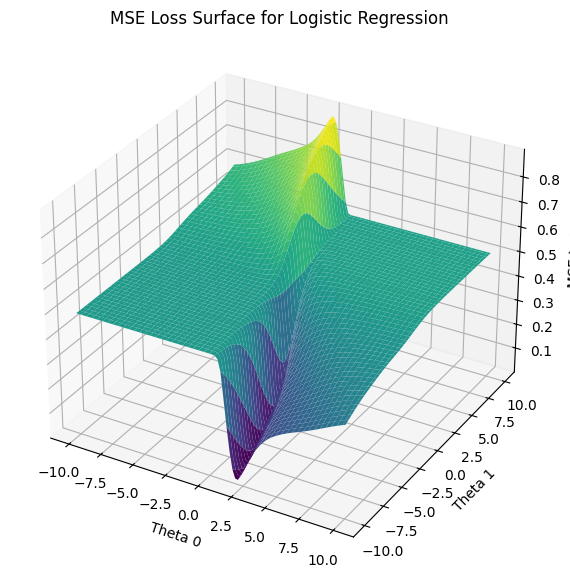

In [28]:
T0, T1 = np.meshgrid(theta_0, theta_1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, loss_values, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('MSE Loss')
ax.set_title('MSE Loss Surface for Logistic Regression')
plt.show()

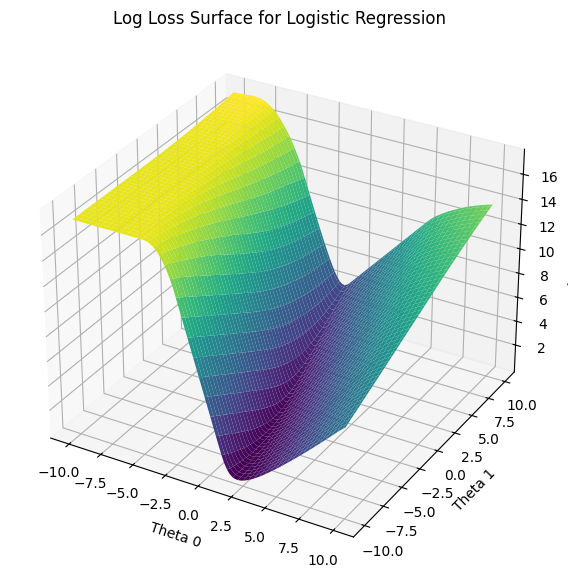

In [29]:
for i, t0 in enumerate(theta_0):
    for j, t1 in enumerate(theta_1):
        theta = np.array([t0, t1])
        y_pred = predict_proba(X_b, theta)
        loss_values[i, j] = log_loss(y, y_pred)

# Visualizar la función de pérdida
T0, T1 = np.meshgrid(theta_0, theta_1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, loss_values, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Log Loss')
ax.set_title('Log Loss Surface for Logistic Regression')
plt.show()

### Simple

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

# Función de Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida de Log-Loss
def compute_loss(y_true, y_pred):
    return log_loss(y_true, y_pred)

# Gradiente de la función de pérdida
def compute_gradient(X, y, weights):
    y_pred = sigmoid(np.dot(X, weights))
    error = y_pred - y
    gradient = np.dot(X.T, error) / len(y)
    return gradient

# Descenso del gradiente para la regresión logística
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    loss_history = []
    weights_history = [weights.copy()]

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient
        weights_history.append(weights.copy())
        loss = compute_loss(y, sigmoid(np.dot(X, weights)))
        loss_history.append(loss)
        if i % 100 == 0:
            print(f'Iteración {i}, Pérdida: {loss}')

    return weights, loss_history, weights_history

In [31]:
# Cargar y preparar los datos
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = y.astype(float)

# Añadir una columna de unos para el intercepto
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los pesos y parámetros
weights = np.zeros(X_train.shape[1])
learning_rate = 0.1
num_iterations = 1000

# Entrenar el modelo
weights, loss_history, weights_history = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

# Predicciones en el conjunto de prueba
y_pred_prob = sigmoid(np.dot(X_test, weights))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'AUC-ROC: {auc}')

Iteración 0, Pérdida: 0.6702930002809515
Iteración 100, Pérdida: 0.17372108755329624
Iteración 200, Pérdida: 0.12598921334751872
Iteración 300, Pérdida: 0.10957292879972758
Iteración 400, Pérdida: 0.10164510313123007
Iteración 500, Pérdida: 0.09714934273263305
Iteración 600, Pérdida: 0.09434782025231106
Iteración 700, Pérdida: 0.09249022329620535
Iteración 800, Pérdida: 0.09120311717564249
Iteración 900, Pérdida: 0.09028158043245595
Accuracy: 1.0
AUC-ROC: 1.0


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

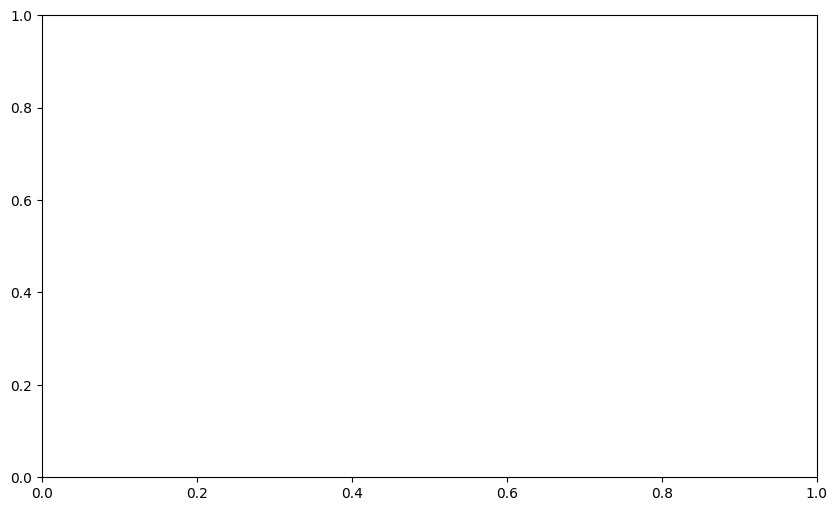

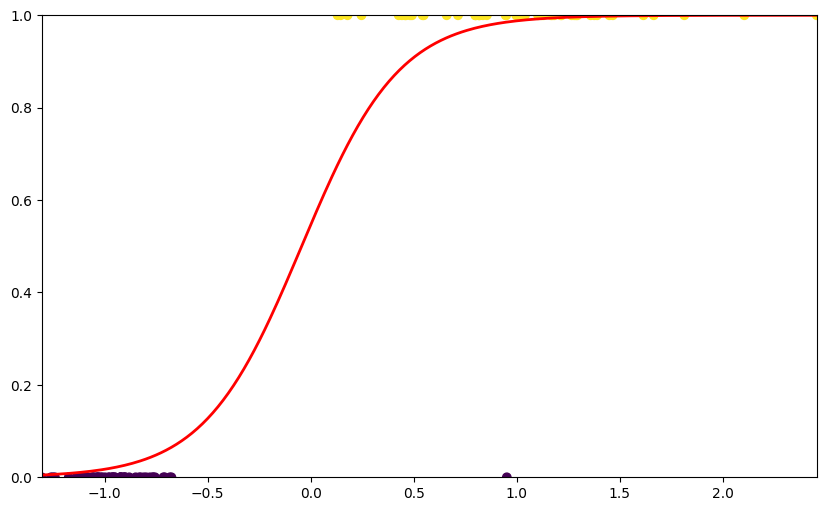

In [32]:
# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 6))

# Inicialización de la gráfica
def init():
    ax.set_xlim(X[:, 1].min(), X[:, 1].max())
    ax.set_ylim(0, 1)
    line.set_data([], [])
    return line,

# Actualización de la gráfica
def animate(i):
    current_weights = weights_history[i]
    x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 300)
    y_values = sigmoid(current_weights[0] + current_weights[1] * x_values)
    line.set_data(x_values, y_values)
    return line,

# Crear la animación de la curva sigmoide
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(X[:, 1].min(), X[:, 1].max())
ax.set_ylim(0, 1)
ax.scatter(X[:, 1], y, c=y, cmap='viridis')
line, = ax.plot([], [], 'r-', lw=2)

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=num_iterations, interval=20, blit=True)

# Guardar la animación como video
ani.save('logistic_regression_training.mp4', writer='ffmpeg', fps=30)

# Mostrar la animación
# plt.show()

# Graficar la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, 'b-')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Pérdida (Log-Loss)')
plt.title('Descenso del Gradiente')
# plt.show()

In [ ]:
from IPython.display import Video

# Reemplaza 'nombre_del_archivo.mp4' con la ruta a tu archivo MP4
Video('/content/logistic_regression_training.mp4', embed=True)

## OTRO PROBLEMA

In [34]:
# Crear la lista de matrículas
matricula = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
             0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
             0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
             1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
             1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
             1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
             0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
             0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
             0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 1, 1]

# Convertir matricula a tipo categórico (equivalente a factor en R)
matricula = pd.Categorical(matricula)

# Crear la lista de puntuaciones de matemáticas
matematicas = [41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
               51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
               63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
               63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
               50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
               57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
               72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
               57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
               56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
               58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
               53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
               63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
               53, 42, 60, 52, 38, 57, 58, 65]

# Crear el DataFrame
datos = pd.DataFrame({'matricula': matricula, 'matematicas': matematicas})

# X = datos.matematicas.values
# X = X.reshape(-1, 1)
# y = datos.matricula.values
# y = y.astype(float)

In [35]:
datos.head()

,matricula,matematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57



Matriz de Confusión:
[[140  11]
 [ 27  22]]


c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


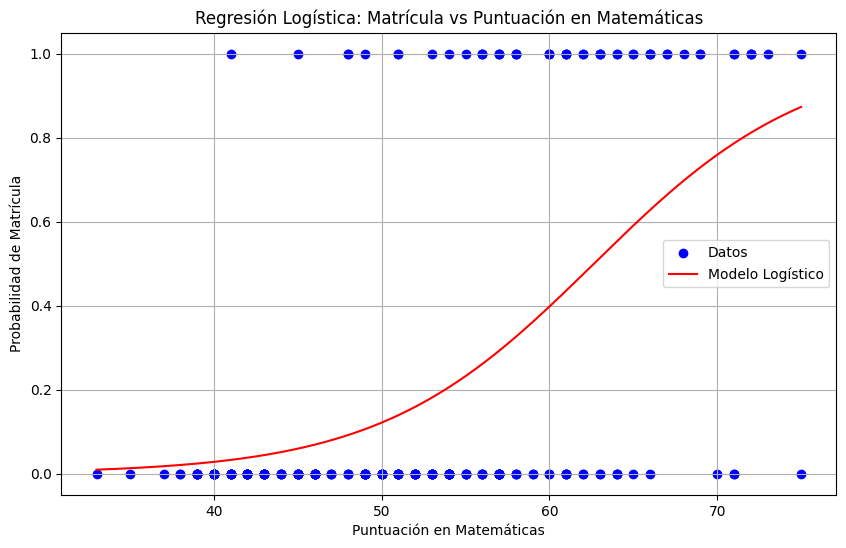


Coeficiente: 0.1562
Intercepto: -9.7881
ROC AUC: 0.83


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Separar las características (X) y la variable objetivo (y)
X = datos[['matematicas']]
y = datos['matricula']

# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
# modelo.fit(X_train, y_train)
modelo.fit(X, y)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X)
y_pred_prob = modelo.predict_proba(X)[:, 1]

# Imprimir el informe de clasificación y la matriz de confusión
# print("Informe de Clasificación:")
# print(classification_report(y, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.xlabel('Puntuación en Matemáticas')
plt.ylabel('Probabilidad de Matrícula')
plt.title('Regresión Logística: Matrícula vs Puntuación en Matemáticas')

# Generar puntos para la curva de regresión logística
X_range = np.linspace(X.min(), X.max(), 300)
y_proba = modelo.predict_proba(X_range.reshape(-1, 1))[:, 1]
plt.plot(X_range, y_proba, color='red', label='Modelo Logístico')

plt.legend()
plt.grid(True)
plt.show()

# Imprimir los coeficientes y el intercepto
print(f"\nCoeficiente: {modelo.coef_[0][0]:.4f}")
print(f"Intercepto: {modelo.intercept_[0]:.4f}")
roc_auc = roc_auc_score(y, y_pred_prob)
print(f'ROC AUC: {roc_auc:.2f}')

## Multiple

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Supuestos en regresión logística usando statsmodels

# Ejemplo de datos ficticios
np.random.seed(0)
X = np.random.normal(size=(100, 3))
beta = np.array([0.5, -1.5, 2.0])
log_odds = X @ beta
prob = 1 / (1 + np.exp(-log_odds))
y = np.random.binomial(1, prob, size=100)

# Agregar constante para la intersección
# X = sm.add_constant(X_train)
# y = y_train
# Ajustar el modelo
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.403513
         Iterations 7


In [39]:
# 1. Independencia de las Observaciones - Prueba de Durbin-Watson en modelos temporales (solo ilustrativo)
dw = sm.stats.durbin_watson(logit_model.resid_generalized)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 2.1483904356248096


 si es mayor a 2 no existe independencia

In [40]:
# 2. Relación Lineal entre las Variables Independientes y el Logit
# Test de Box-Tidwell
X_transformed = np.column_stack([X, np.log(np.abs(X[:, 1:] + 1e-10)) * X[:, 1:]])
logit_model_transformed = sm.Logit(y, X_transformed).fit()
print(logit_model_transformed.summary())

Optimization terminated successfully.
         Current function value: 0.399581
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.4175
Time:                        23:47:37   Log-Likelihood:                -39.958
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                 1.086e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9504      0.311      3.058      0.002       0.341       1.560
x2            -0.9156      0.

el error es bajo, el x4 y x5 tienen un error alto

In [41]:
# 3. Multicolinealidad - VIF
vif = pd.DataFrame()
vif['variable'] = ['X1', 'X2', 'X3'] # Remove 'const' row
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,variable,VIF
0,X1,1.013256
1,X2,1.004907
2,X3,1.010555


 Se tiene que tener en cuenta que las variables no tengan alto score

In [43]:
# 4. Outliers Influyentes - Residuos estandarizados y DFBETAS
influence = logit_model.get_influence()
summary_frame = influence.summary_frame()
# summary_frame[['standard_resid', 'dfb_const', 'dfb_x1', 'dfb_x2', 'dfb_x3']]

# Identificar outliers influyentes
outliers = summary_frame[np.abs(summary_frame['standard_resid']) > 3]
outliers

,dfb_x1,dfb_x2,dfb_x3,cooks_d,standard_resid,hat_diag,dffits_internal
63,-0.589864,0.538158,-0.391917,0.179110,-5.021939,0.020861,-0.733029
83,-0.550702,0.324131,-0.423853,0.130039,4.499276,0.018907,0.624594


detecta cuales son los potenciales outliers que pueden influir en los resultados, lo cual se deben eliminar considerando el indice

## Evaluación del rendimiento

Matriz de confusión:
 [[88 18]
 [12 82]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       106
           1       0.82      0.87      0.85        94

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

ROC AUC: 0.94


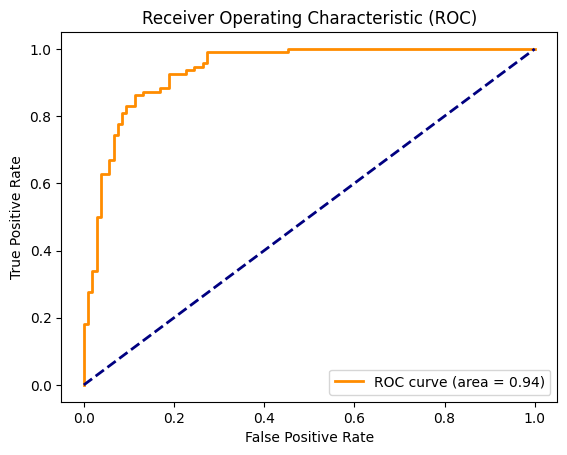

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Generar datos ficticios
np.random.seed(0)
X = np.random.normal(size=(1000, 3))
beta = np.array([0.5, -1.5, 2.0])
log_odds = X @ beta
prob = 1 / (1 + np.exp(-log_odds))
y = np.random.binomial(1, prob, size=1000)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", class_report)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.2f}')

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()